<a href="https://colab.research.google.com/github/0-Priya/CreditCardFraud_Detection/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(37722, 31)

In [ ]:
df.isnull().any().sum()


24

In [ ]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')
print(len(fraud))

frauds : 0.27305020942685965 %
non frauds : 99.72429881766608 %
103


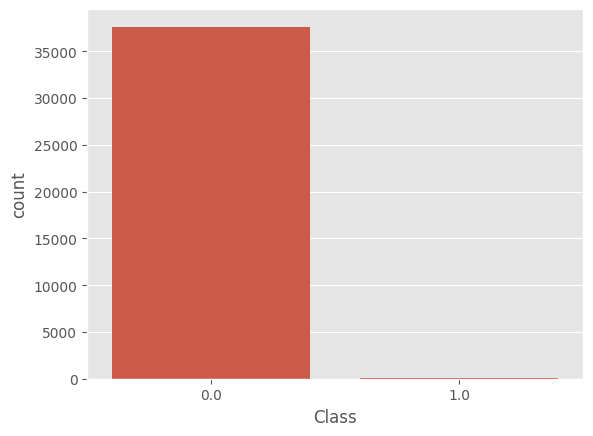

In [ ]:
sns.countplot(x='Class',data=df)
plt.show()

<ipython-input-7-fe51125e5f5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount)


<Axes: ylabel='Density'>

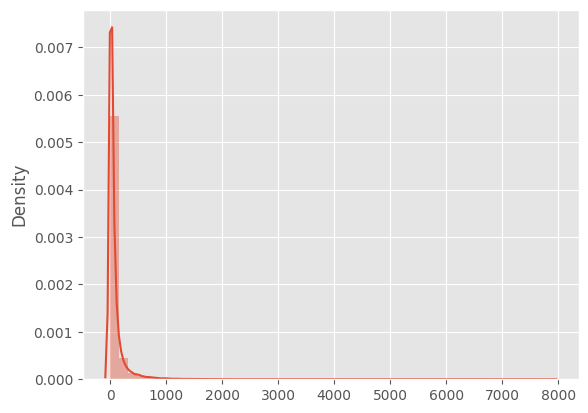

In [ ]:
amount = [df['Amount'].values]
sns.distplot(amount)

<ipython-input-8-8ae2e8e761b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time)


<Axes: ylabel='Density'>

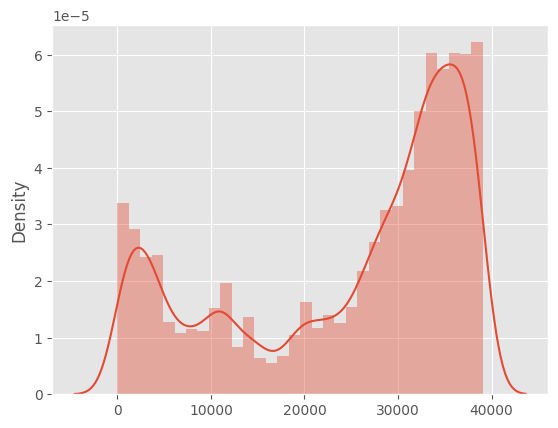

In [ ]:

time = [df['Time'].values]
sns.distplot(time)

<ipython-input-9-ae8e7e97451c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 1], bins=50)
<ipython-input-9-ae8e7e97451c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 0], bins=50)
<ipython-input-9-ae8e7e97451c>:8: UserWarning: 

`distplot` is a depreca

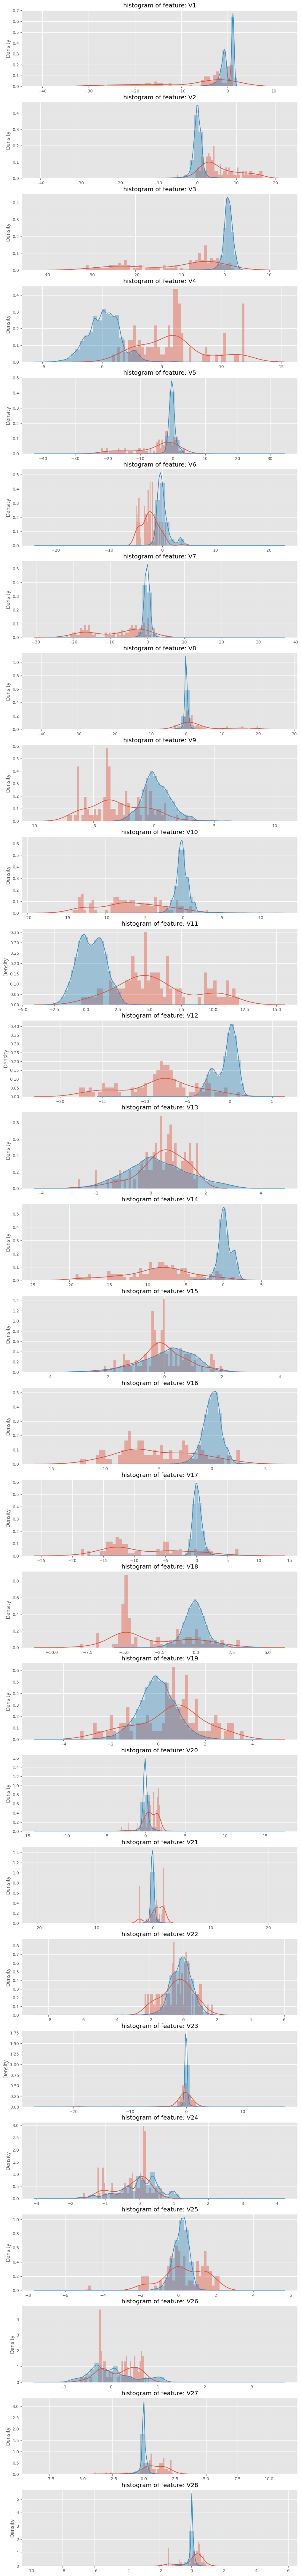

In [ ]:
import matplotlib.gridspec as gridspec
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Read the data from a CSV file
df = pd.read_csv('/content/creditcard.csv')

# Extract the data into the variable X
X = df.iloc[:, 1:29]

# Instantiate SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like median or mode

# Impute missing values in your data
X_imputed = imputer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_imputed)

# Create a DataFrame to store the principal components
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2'])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Instantiate SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like median or mode

# Impute missing values in your data
X_imputed = imputer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_imputed)

# Create a DataFrame to store the principal components
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2'])


In [ ]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_imputed)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,0.617703,0.445592,0.0
1,-1.223966,-0.536814,0.0
2,0.673659,1.414334,0.0
3,0.157265,0.594187,0.0
4,0.574437,-0.461840,0.0


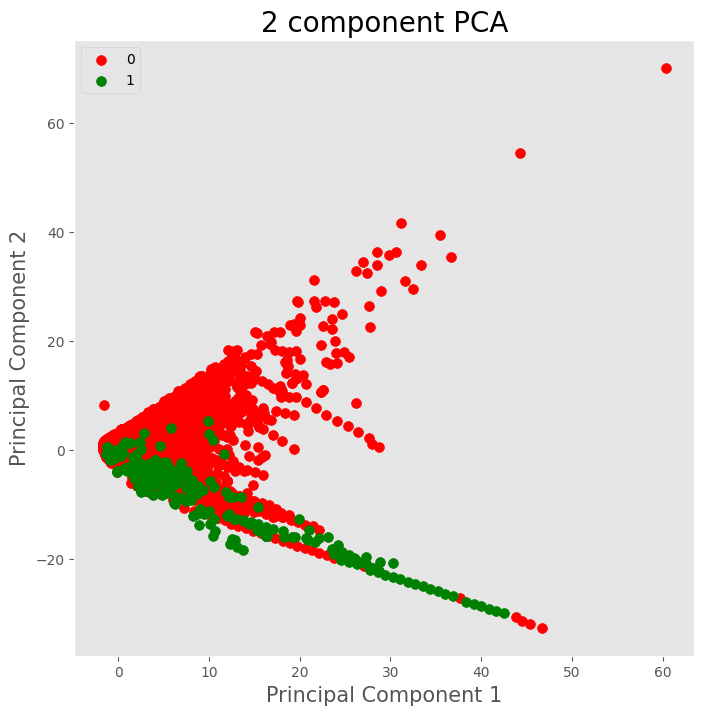

In [ ]:
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1)
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
#targets = [0, 1]
#colors = ['r', 'g']
#for target, color in zip(targets,colors):
 #   indicesToKeep = finalDf['Class'] == target
  #  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
   #            , finalDf.loc[indicesToKeep, 'principal component 2']
    #           , c = color
     #          , s = 50)
#ax.legend(targets)
#ax.grid()

Text(0, 0.5, 'Frequency')

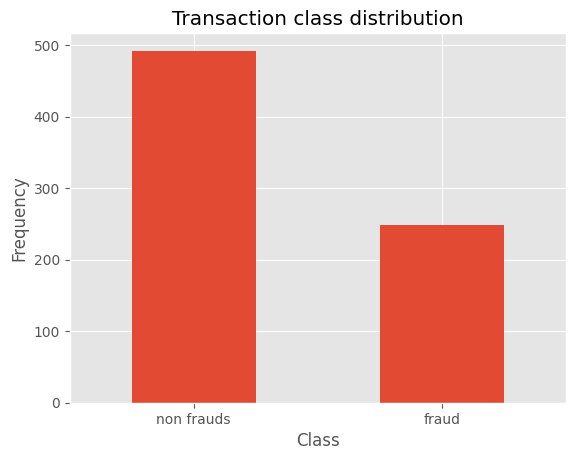

In [ ]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
new_df = new_df.sample(frac=1, random_state=42)

labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [ ]:
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)
X_train = normalize(X_train)
X_test=normalize(X_test)

In [ ]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    knn.fit(X_train,y_train.ravel())
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

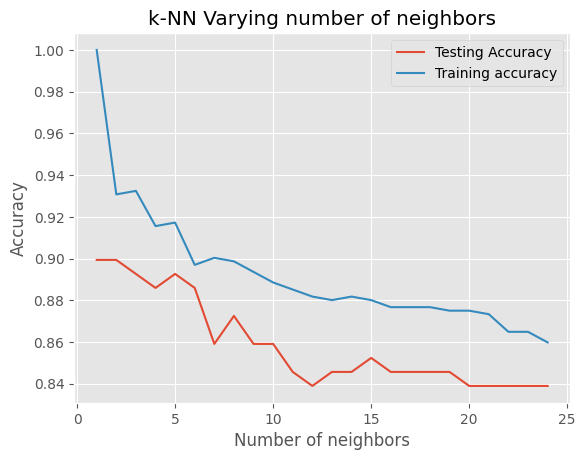

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [ ]:

knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=1)

In [ ]:

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [ ]:

knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

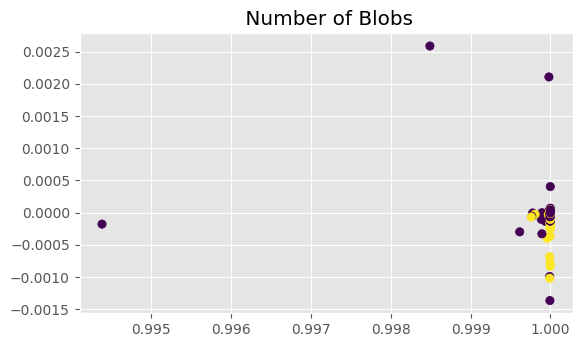

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [ ]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             =    matthews_corrcoef(y_test,knn_predicted_test_labels)

In [ ]:

print(knn_accuracy_score)
print(knn_precison_score)
print(knn_recall_score)
print(knn_f1_score )


0.8993288590604027
0.8571428571428571
0.84
0.8484848484848485


In [ ]:

print(knn_f1_score)

0.8484848484848485
